In [1]:
# Remover as linhas duplicadas

import pandas as pd # type: ignore

df = pd.read_csv('googleplaystore.csv')
df.drop_duplicates(subset = None, inplace = True)
df.to_csv('googleplaystore.csv', index = False)


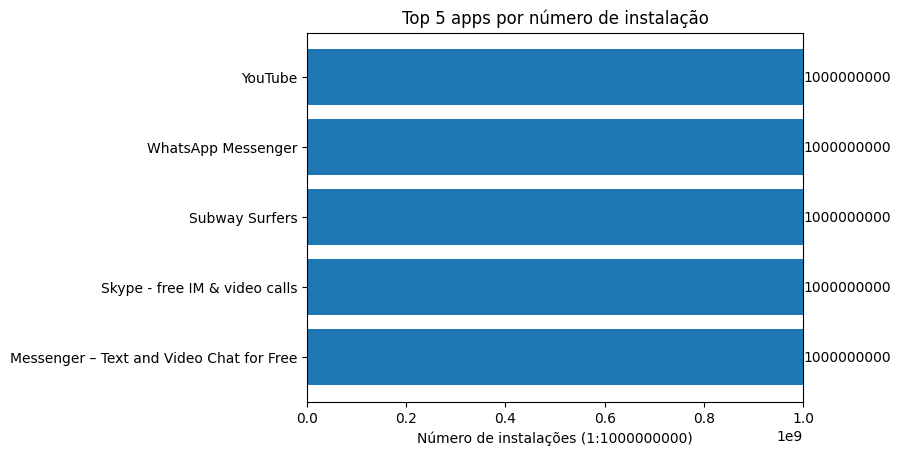

In [2]:
# Fazer um gráfico de barras contendo os top 5 apps por número de instalação

import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

app_nomes = []
app_installs = []
apps_to_drop = []

df = pd.read_csv('googleplaystore.csv')

for i in range(len(df)):
    if df.iloc[i]['Installs'].replace(',', '').replace('+', '').isnumeric() == False:
        apps_to_drop.append(i)
    else:
        df.loc[i, 'Installs'] = int(df.iloc[i]['Installs'].replace(',', '').replace('+', ''))
        
for i in range(len(apps_to_drop)):
    df = df.drop(index=apps_to_drop[i])
    
df = df.sort_values(by = ['Installs', 'App'], ascending = False, na_position = 'last')
df = df.drop_duplicates(subset=['App'])
df = df.head()

for i in range(len(df)):
    app_nomes.append(df.iloc[i]['App'])
    app_installs.append(df.iloc[i]['Installs'])

y_pos = np.arange(len(app_nomes))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, app_installs, align='center')
ax.set_yticks(y_pos, labels=app_nomes)
ax.invert_yaxis()  # labels no sentido de leitura de cima para baixo
ax.set_xlabel('Número de instalações (1:1000000000)')
ax.set_title('Top 5 apps por número de instalação')

ax.bar_label(hbars, fmt='%.0f')
ax.set_xlim(right=app_installs[0])  # ajustar xlim para caber a maior barra

plt.show()


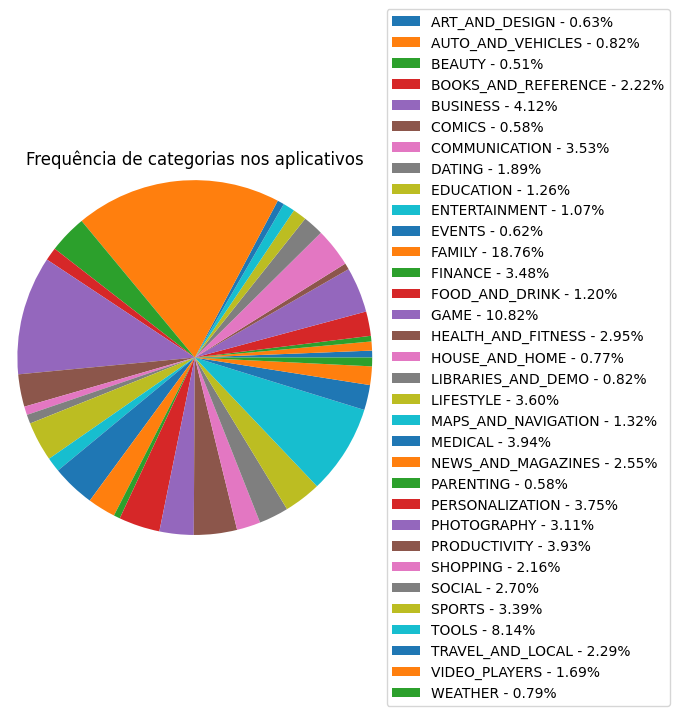

In [3]:
# Fazer um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência 

import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

def checarString(str):
    contem_n = False
 
    for i in str:
 
        if i.isdigit():
            contem_n = True
            
    return contem_n


app_category = []
app_category_count = []
app_category_total_count = 0
apps_to_drop = []

df = pd.read_csv('googleplaystore.csv')

for i in range(len(df)):
    if checarString(df.iloc[i]['Category']) == True:
        apps_to_drop.append(i)
        
for i in range(len(apps_to_drop)):
    df = df.drop(index=apps_to_drop[i])

df = df.groupby(['Category']).count()

for i in range(len(df)):
    app_category.append(df.index[i])
    app_category_count.append(int(df['App'].iloc[i]))
    app_category_total_count += df['App'].iloc[i]

app_category_percentage = [(app_category_count[i] * 100) / app_category_total_count for i in range(len(app_category_count))]

labels = [f'{app_category[i]} - {app_category_percentage[i]:1.2f}%' for i in range(len(app_category))]

fig, ax = plt.subplots()
ax.set_title('Frequência de categorias nos aplicativos')
ax.pie(app_category_percentage, radius=1.2)
ax.legend(labels=labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [4]:
# Mostrar app mais caro existente no dataset

import pandas as pd # type: ignore

most_expensive_price = 0.0
most_expensive = []

df = pd.read_csv('googleplaystore.csv')

for i in range(len(df)):
    current_price = df.iloc[i]['Price']
    if isinstance(current_price, str):
        if current_price.startswith('$') or current_price.replace('.', '', 1).isdigit():
            if float(current_price.replace('$', '')) > most_expensive_price:
                most_expensive_price = float(current_price.replace('$', ''))
                most_expensive.clear()
                most_expensive.append(i)
            elif float(current_price.replace('$', '')) == most_expensive_price:
                most_expensive_price = float(current_price.replace('$', ''))
                most_expensive.append(i)
    elif isinstance(current_price, int) or isinstance(current_price, float):
        if float(current_price) > most_expensive_price:
            most_expensive_price = float(current_price)
            most_expensive.clear()
            most_expensive.append(i)
        elif float(current_price) == most_expensive_price:
            most_expensive_price = float(current_price)
            most_expensive.append(i)

print('O(s) app(s) mais caros existente(s) no dataset:')
for i in range(len(most_expensive)):
    print (df.iloc[most_expensive[i]]['App'] + ', custando ' + df.iloc[most_expensive[i]]['Price'])
 

O(s) app(s) mais caros existente(s) no dataset:
I'm Rich - Trump Edition, custando $400.00


In [5]:
# Mostrar quantos apps são classificados como 'Mature 17+'

import pandas as pd # type: ignore

df = pd.read_csv('googleplaystore.csv')
df = df.groupby(['Content Rating']).count()

print('A quantidade de apps classificados como "Mature 17+" é ' + str(df.loc['Mature 17+']['App']))


A quantidade de apps classificados como "Mature 17+" é 447


Os 10 apps com mais reviews:
Nome do app: Facebook; Número de reviews: 78158306
Nome do app: WhatsApp Messenger; Número de reviews: 69119316
Nome do app: Instagram; Número de reviews: 66577446
Nome do app: Messenger – Text and Video Chat for Free; Número de reviews: 56646578
Nome do app: Clash of Clans; Número de reviews: 44893888
Nome do app: Clean Master- Space Cleaner & Antivirus; Número de reviews: 42916526
Nome do app: Subway Surfers; Número de reviews: 27725352
Nome do app: YouTube; Número de reviews: 25655305
Nome do app: Security Master - Antivirus, VPN, AppLock, Booster; Número de reviews: 24900999
Nome do app: Clash Royale; Número de reviews: 23136735


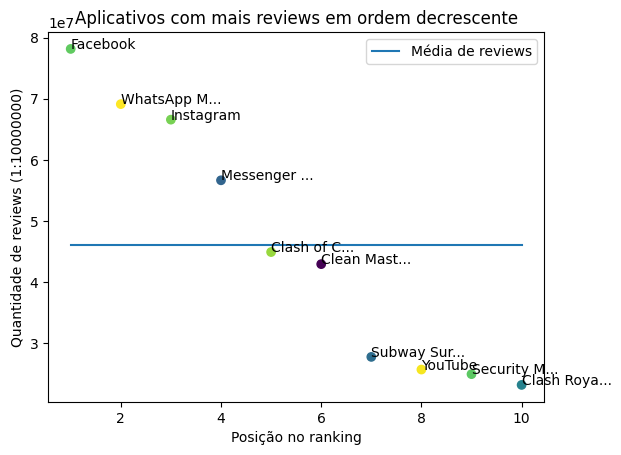

In [6]:
# Mostrar o top 10 apps por número de reviews

import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

most_reviews = []
apps_to_drop = []

df = pd.read_csv('googleplaystore.csv')

for i in range(len(df)):
    if df.iloc[i]['Reviews'].isdigit() == False:
        apps_to_drop.append(i)
    else:
        df.loc[i, 'Reviews'] = int(df.iloc[i]['Reviews'])
        
for i in range(len(apps_to_drop)):
    df = df.drop(index=apps_to_drop[i])

df = df.sort_values(by = ['Reviews', 'App'], ascending = False, na_position = 'last')
df = df.drop_duplicates(subset=['App'])
df = df.head(10)

print('Os 10 apps com mais reviews:')
for index, row in df.iterrows():
    print(f'Nome do app: {row['App']}; Número de reviews: {row['Reviews']}')
    
# Criar, pelo menos, outras 2 formas gráficas de exibição dos indicadores

# Gráfico de dispersão baseado nos top 10 apps por número de reviews

x = np.arange(1, len(df) + 1)
y = [df.iloc[i]['Reviews'] for i in x - 1]
colors = np.random.rand(len(x))

# Calcular a média simples dos dados
media_y = [np.mean(y)]*len(x)

fig, ax = plt.subplots()

plt.scatter(x, y, c=colors)

linha_media = ax.plot(x, media_y, label='Média de reviews')

# Textos do gráfico
apps_names = [df.iloc[i]['App'][:10] + '...' if len(df.iloc[i]['App']) > 10 else df.iloc[i]['App'] for i in x - 1]

ax.set_title('Aplicativos com mais reviews em ordem decrescente')
plt.xlabel('Posição no ranking')
plt.ylabel('Quantidade de reviews (1:10000000)')

for i, txt in enumerate(apps_names):
    ax.annotate(txt, (x[i], y[i]))

legend = ax.legend(loc='upper right')

plt.show()


Os 10 gêneros de aplicativos mais frequentes:
Gênero: Tools; Quantidade de aplicativos deste gênero: 843
Gênero: Education; Quantidade de aplicativos deste gênero: 717
Gênero: Entertainment; Quantidade de aplicativos deste gênero: 628
Gênero: Business; Quantidade de aplicativos deste gênero: 427
Gênero: Medical; Quantidade de aplicativos deste gênero: 408
Gênero: Productivity; Quantidade de aplicativos deste gênero: 407
Gênero: Personalization; Quantidade de aplicativos deste gênero: 388
Gênero: Lifestyle; Quantidade de aplicativos deste gênero: 374
Gênero: Action; Quantidade de aplicativos deste gênero: 371
Gênero: Sports; Quantidade de aplicativos deste gênero: 368


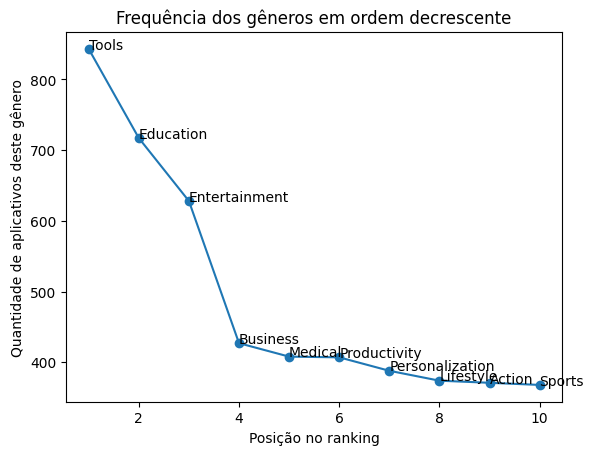

In [7]:
# Criar, pelo menos, mais 2 cálculos sobre o dataset

# Lista: top 10 gêneros de aplicativos mais frequentes

import pandas as pd # type: ignore

def checarString(str):
    contem_n = False
 
    for i in str:
 
        if i.isdigit():
            contem_n = True
            
    return contem_n

apps_to_drop = []

df = pd.read_csv('googleplaystore.csv')

for i in range(len(df)):
    if checarString(df.iloc[i]['Genres']) == True:
        apps_to_drop.append(i)
        
for i in range(len(apps_to_drop)):
    df = df.drop(index=apps_to_drop[i])
    
genres = df['Genres'].unique()

unique_genres = set()

for genre in genres:
    unique_genres.update(genre.split(';'))

unique_genres = list(unique_genres)
unique_genres.sort()

unique_genres = {unique_genres[i]: 0 for i in range (len(unique_genres))}

for i in range(len(df)):
    if ';' in df.iloc[i]['Genres']:
        genres = df.iloc[i]['Genres'].split(';')
        
        if genres[0] in unique_genres:
            unique_genres[genres[0]] = unique_genres.get(genres[0]) + 1
            
        if genres[1] in unique_genres:
            unique_genres[genres[1]] = unique_genres.get(genres[1]) + 1
    else:
        genre = df.iloc[i]['Genres']
        
        if genre in unique_genres:
            unique_genres[genre] = unique_genres.get(genre) + 1
    
unique_genres = dict(sorted(unique_genres.items(), key=lambda item: item[1], reverse=True))
unique_genres = dict(list(unique_genres.items())[0: 10]) 

print('Os 10 gêneros de aplicativos mais frequentes:')
for key, value in unique_genres.items():
    print(f'Gênero: {key}; Quantidade de aplicativos deste gênero: {value}')
    

# Gráfico de linha baseado nos top 10 apps por número de reviews

x = np.arange(1, len(unique_genres) + 1)
y = [list(unique_genres.values())[i] for i in x - 1]

fig,ax = plt.subplots()

linha = ax.plot(x, y, marker='o')

# Texto do gráfico
category_names = [list(unique_genres.keys())[i] for i in x - 1]

ax.set_title('Frequência dos gêneros em ordem decrescente')
plt.xlabel('Posição no ranking')
plt.ylabel('Quantidade de aplicativos deste gênero')

for i, txt in enumerate(category_names):
    ax.annotate(txt, (x[i], y[i]))

plt.show()


In [8]:
# Criar, pelo menos, mais 2 cálculos sobre o dataset

# Valor: quantidade de aplicativos gratuitos

import pandas as pd # type: ignore

df = pd.read_csv('googleplaystore.csv')
df = df.groupby(['Type']).count()

print('A quantidade de apps gratuitos é ' + str(df.loc['Free']['App']))


A quantidade de apps gratuitos é 9591
